### Analiza gleby w Afryce na potrzeby mapowania

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('iSDA-Africa-soil-analysis.csv', sep='|')
print(df.shape)
print(df.isnull().sum())

(49225, 24)
longitude                      0
latitude                       0
start_date                     0
end_date                       0
source                         0
horizon_lower                  0
horizon_upper                  0
aluminium_extractable          2
boron_extractable          47114
calcium_extractable            0
carbon_organic                 0
carbon_total                2157
copper_extractable            46
electrical_conductivity    47116
iron_extractable              46
magnesium_extractable          0
manganese_extractable         48
nitrogen_total                46
ph                             3
phosphorus_extractable     47114
potassium_extractable          0
sodium_extractable         47070
sulphur_extractable        47114
zinc_extractable           47114
dtype: int64


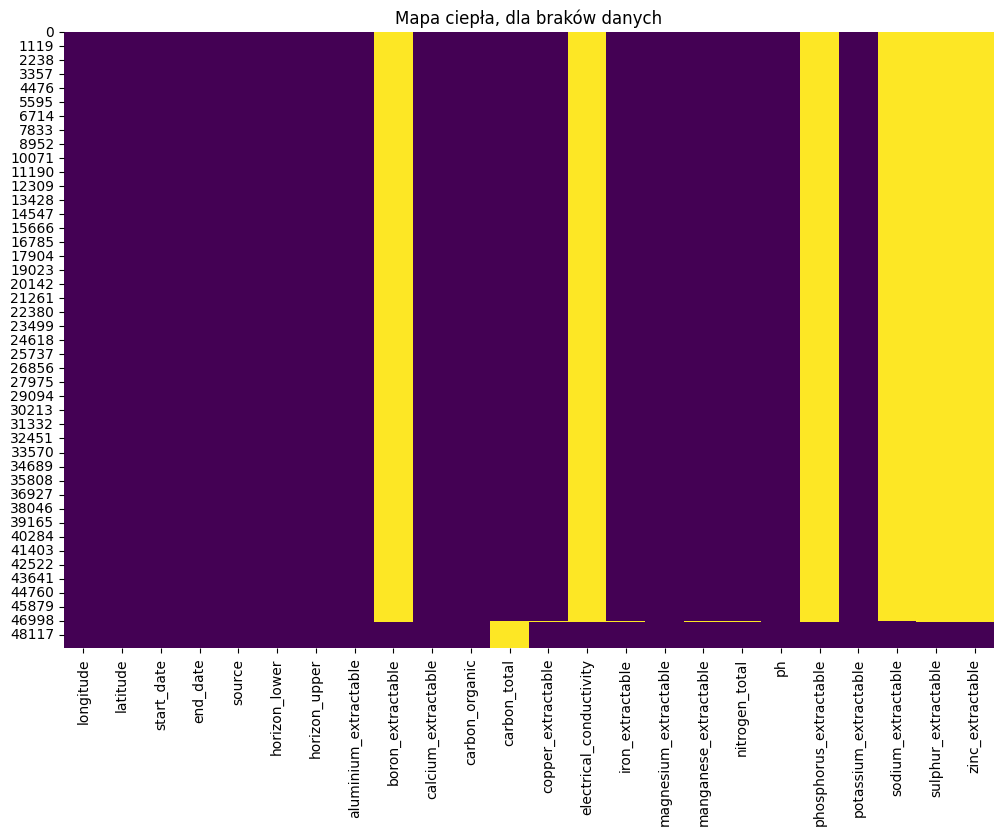


Braki w danych liczone wg. atrybutów
aluminium_extractable          2
boron_extractable          47114
carbon_total                2157
copper_extractable            46
electrical_conductivity    47116
iron_extractable              46
manganese_extractable         48
nitrogen_total                46
ph                             3
phosphorus_extractable     47114
sodium_extractable         47070
sulphur_extractable        47114
zinc_extractable           47114
dtype: int64

Braki w danych liczone wg. obiektów

Braki w danych liczone wg. obiektów
0        6
1        6
2        6
3        6
4        6
        ..
49220    1
49221    1
49222    1
49223    5
49224    5
Length: 49225, dtype: int64


(aluminium_extractable          2
 boron_extractable          47114
 carbon_total                2157
 copper_extractable            46
 electrical_conductivity    47116
 iron_extractable              46
 manganese_extractable         48
 nitrogen_total                46
 ph                             3
 phosphorus_extractable     47114
 sodium_extractable         47070
 sulphur_extractable        47114
 zinc_extractable           47114
 dtype: int64,
 0        6
 1        6
 2        6
 3        6
 4        6
         ..
 49220    1
 49221    1
 49222    1
 49223    5
 49224    5
 Length: 49225, dtype: int64)

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple

def analyze(df: pd.DataFrame) -> Tuple[pd.Series, pd.Series]:
    """
    Przeprowadza kompletną analizę braków w ramce danych i je wizualizuje.

    Parametry:
    df (pd.DataFrame): Ramka danych do analizy.

    Zwraca:
    (missing_attributes, missing_objects): Krotkę zawierającą dwie pd.Series:
        - Pierwsza pd.Series zawierającą sumę braków w danych liczonych wg. atrybutów (kolumn).
        - Druga pd.Series zawierającą sumę braków w danych liczonych wg. obiektów (wierszy).
    """
    visualize_missing_values(df)
    return identify_missing_values(df)

def identify_missing_values(df: pd.DataFrame) -> Tuple[pd.Series, pd.Series]:
    """
    Wypisuje sumę braków danych dla każdego atrybutu i obiektu w ramce danych

    Parametry:
    df (pd.DataFrame): Ramka danych do analizy.

    Zwraca:
    (missing_attributes_filtred, missing_objects_filtred): Krotkę zawierającą dwie pd.Series:
        - Pierwsza pd.Series zawierającą sumę braków w danych liczonych wg. atrybutów (kolumn).
        - Druga pd.Series zawierającą sumę braków w danych liczonych wg. obiektów (wierszy).
    Wypisuje braki do konsoli.
    """
    missing_attributes = df.isnull().sum()
    missing_attributes_filtred = missing_attributes[missing_attributes > 0]
    
    if not missing_attributes_filtred.empty:
        print("\nBraki w danych liczone wg. atrybutów")
        print(missing_attributes_filtred)
    else:
        print("\nBrak braków w danych liczonych wg. atrybutów")

    print("\nBraki w danych liczone wg. obiektów")
    missing_objects = df.isnull().sum(axis=1)
    missing_objects_filtred = missing_objects[missing_objects > 0]
    
    if not missing_objects_filtred.empty:
        print("\nBraki w danych liczone wg. obiektów")
        print(missing_objects_filtred)
    else:
        print("\nBrak braków w danych liczonych wg. obiektów")

    return missing_attributes_filtred, missing_objects_filtred

def visualize_missing_values(df: pd.DataFrame) -> None:
    """
    Tworzy mapę ciepła do wizualizacji braków w ramce danych.

    Parametry:
    df (pd.DataFrame): Ramka danych do wizualizacji.

    Zwraca:
    None: Wyświetla mapę ciepła dla braków w ramce danych.
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title("Mapa ciepła, dla braków danych")
    plt.show()

analyze(df)

In [71]:
df.drop(columns = ['boron_extractable', 'electrical_conductivity', 'phosphorus_extractable', 'sodium_extractable', 'sulphur_extractable', 'zinc_extractable', 'source'], inplace = True)

In [72]:
df.dropna(inplace = True)

In [73]:
df

,longitude,latitude,start_date,end_date,horizon_lower,horizon_upper,aluminium_extractable,calcium_extractable,carbon_organic,carbon_total,copper_extractable,iron_extractable,magnesium_extractable,manganese_extractable,nitrogen_total,ph,potassium_extractable
0,35.18756,-8.62390,01/01/2008,31/12/2018,50,20,1109.8560,1535.3880,30.660,31.500,2.2590,92.3660,200.6010,107.2570,2.240,5.9420,283.1030
1,35.18558,-8.62300,01/01/2008,31/12/2018,50,20,1168.3640,751.4080,21.150,19.360,1.8220,115.9230,197.7710,90.0050,1.570,5.7220,215.4590
2,35.18579,-8.62221,01/01/2008,31/12/2018,50,20,1137.1130,468.3910,15.640,13.950,1.9130,78.7090,188.1140,120.4330,1.020,5.5100,398.6560
3,35.18266,-8.62177,01/01/2008,31/12/2018,50,20,1117.3490,739.6980,15.630,12.320,2.8760,127.5270,156.4170,112.0360,1.120,5.8170,267.3540
4,35.12984,-8.62005,01/01/2008,31/12/2018,50,20,1219.2030,240.0710,18.490,17.340,1.8250,77.5420,114.8090,57.9060,1.190,4.9800,229.6820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47063,34.26474,-4.31395,01/01/2008,31/12/2018,20,0,822.4130,3723.8965,14.415,13.345,5.7875,131.2095,895.6155,186.3840,0.975,7.2875,113.1200
47064,34.23018,-5.85918,01/01/2008,31/12/2018,20,0,686.7090,647.1340,8.300,8.105,1.8900,116.4310,198.7445,171.3545,0.710,6.0815,138.3225
47065,36.69943,-8.92300,01/01/2008,31/12/2018,20,0,869.4525,1069.3505,19.610,20.135,4.4885,110.2970,282.6695,272.5590,1.655,5.9515,332.8250
47066,34.16855,-5.89630,01/01/2008,31/12/2018,20,0,523.0800,1979.7570,14.960,17.025,2.4265,128.2410,492.0670,104.9485,1.140,6.7125,299.5010


In [74]:
ethiopia = df[((df['latitude'] <= 15) & (df['latitude'] >= 3)) & ((df['longitude'] <= 48) & (df['longitude'] >= 33))]
ethiopia

,longitude,latitude,start_date,end_date,horizon_lower,horizon_upper,aluminium_extractable,calcium_extractable,carbon_organic,carbon_total,copper_extractable,iron_extractable,magnesium_extractable,manganese_extractable,nitrogen_total,ph,potassium_extractable
5322,38.33126,4.13802,01/01/2008,31/12/2018,50,20,424.022,14355.988,21.57,28.80,5.562,33.169,1731.735,131.965,1.71,8.646,521.669
5323,38.32690,4.14211,01/01/2008,31/12/2018,50,20,511.353,15971.193,22.02,28.54,4.721,34.040,2202.642,103.825,1.89,8.444,554.995
5324,38.32576,4.14236,01/01/2008,31/12/2018,50,20,459.344,14433.999,18.56,25.20,4.758,34.537,2067.014,96.220,1.24,8.592,482.228
5325,38.33437,4.14254,01/01/2008,31/12/2018,50,20,424.068,15139.603,20.81,29.55,4.881,31.159,1725.257,124.995,1.49,8.483,563.140
5326,38.25786,4.14264,01/01/2008,31/12/2018,50,20,582.067,4848.325,10.24,10.99,2.868,55.062,726.815,162.170,0.73,8.367,710.718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20288,39.61586,11.33428,01/01/2008,31/12/2018,20,0,661.948,8252.704,11.22,11.22,4.619,103.940,1808.283,196.596,0.63,8.809,473.961
20299,39.61544,11.33622,01/01/2008,31/12/2018,20,0,718.764,6962.393,11.97,11.97,4.052,82.277,1484.014,182.261,0.75,8.539,1154.391
20300,39.61544,11.33622,01/01/2008,31/12/2018,20,0,860.066,5800.651,7.10,7.13,3.409,220.043,988.175,140.140,0.54,6.954,425.704
20303,39.59075,11.33642,01/01/2008,31/12/2018,20,0,908.230,6909.910,30.85,32.59,3.816,198.750,1303.179,104.198,2.41,6.698,458.321


In [75]:
ghana = df[((df['latitude'] <= 12) & (df['latitude'] >= 4)) & ((df['longitude'] <= 2) & (df['longitude'] >= -4))]
ghana

,longitude,latitude,start_date,end_date,horizon_lower,horizon_upper,aluminium_extractable,calcium_extractable,carbon_organic,carbon_total,copper_extractable,iron_extractable,magnesium_extractable,manganese_extractable,nitrogen_total,ph,potassium_extractable
5657,-0.70950,5.36684,01/01/2008,31/12/2018,50,20,519.9750,745.5680,6.070,6.070,0.8180,182.1360,165.5510,89.3040,0.640,6.1550,70.3250
5658,-0.71200,5.36819,01/01/2008,31/12/2018,50,20,706.3900,1589.8480,7.500,10.140,0.9750,163.3840,154.9840,73.8200,0.760,6.5020,101.4400
5659,-0.71362,5.36870,01/01/2008,31/12/2018,50,20,1036.9720,507.6900,6.110,7.790,1.1850,183.4950,275.5160,38.3140,0.680,5.3490,104.1640
5660,-0.70940,5.36893,01/01/2008,31/12/2018,50,20,749.1730,1461.8550,7.620,8.020,1.5560,186.6450,154.8810,106.7850,0.830,6.3720,93.4340
5661,-0.71544,5.36904,01/01/2008,31/12/2018,50,20,714.0390,1457.9830,9.070,9.850,1.9730,177.2980,444.3840,141.7720,0.840,6.8100,133.4840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21495,-2.34186,7.33884,01/01/2008,31/12/2018,20,0,502.5570,893.5490,5.760,5.120,0.7540,119.6680,133.8920,37.8070,0.340,5.8380,70.4480
21496,-2.29878,7.38115,01/01/2008,31/12/2018,20,0,1144.4150,1696.7080,9.160,9.980,2.2590,75.0360,282.3980,156.3120,0.890,6.5820,107.7860
21497,-2.00113,7.76301,01/01/2008,31/12/2018,20,0,403.9920,378.0915,7.145,5.515,0.1705,70.9280,96.7270,35.8390,0.340,6.0675,49.4900
21498,-1.91427,7.52967,01/01/2008,31/12/2018,20,0,941.3445,1276.2890,15.850,17.050,1.5710,89.4585,253.9005,217.4825,1.215,6.2755,89.4725


In [76]:
nigeria = df[((df['latitude'] <= 14) & (df['latitude'] >= 4)) & ((df['longitude'] <= 15) & (df['longitude'] >= 3))]
nigeria

,longitude,latitude,start_date,end_date,horizon_lower,horizon_upper,aluminium_extractable,calcium_extractable,carbon_organic,carbon_total,copper_extractable,iron_extractable,magnesium_extractable,manganese_extractable,nitrogen_total,ph,potassium_extractable
5487,10.23145,5.22749,01/01/2008,31/12/2018,50,20,1560.440,788.519,39.45,40.03,1.456,80.751,164.819,55.148,2.54,5.264,166.184
5488,10.29363,5.22770,01/01/2008,31/12/2018,50,20,1330.957,868.596,23.86,25.29,2.628,108.958,217.552,120.974,1.67,5.981,184.767
5489,10.29536,5.22800,01/01/2008,31/12/2018,50,20,1462.147,666.974,17.05,17.45,2.074,106.923,194.957,89.063,1.11,5.227,132.120
5490,10.28907,5.22820,01/01/2008,31/12/2018,50,20,1233.879,656.367,31.84,31.84,2.018,112.911,190.296,84.676,2.11,5.307,115.311
5491,10.29127,5.22860,01/01/2008,31/12/2018,50,20,1507.737,940.170,31.58,32.98,1.862,97.847,200.624,109.150,2.14,5.525,121.878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20390,8.14569,11.35791,01/01/2008,31/12/2018,20,0,528.322,1390.201,4.69,4.69,0.742,117.459,224.310,36.496,0.42,6.280,120.632
20391,8.15179,11.35798,01/01/2008,31/12/2018,20,0,729.170,888.539,4.86,4.86,1.211,86.699,220.653,77.721,0.41,6.351,178.392
20392,8.15216,11.35799,01/01/2008,31/12/2018,20,0,641.914,754.460,4.88,4.95,0.744,84.342,180.195,79.929,0.42,6.344,136.793
20393,8.14757,11.35801,01/01/2008,31/12/2018,20,0,481.826,625.576,4.81,5.07,0.479,106.821,151.381,42.532,0.44,6.240,105.952


In [77]:
tanzania = df[((df['latitude'] <= -1) & (df['latitude'] >= -12)) & ((df['longitude'] <= 41) & (df['longitude'] >= 29))]
tanzania

,longitude,latitude,start_date,end_date,horizon_lower,horizon_upper,aluminium_extractable,calcium_extractable,carbon_organic,carbon_total,copper_extractable,iron_extractable,magnesium_extractable,manganese_extractable,nitrogen_total,ph,potassium_extractable
0,35.18756,-8.62390,01/01/2008,31/12/2018,50,20,1109.8560,1535.3880,30.660,31.500,2.2590,92.3660,200.6010,107.2570,2.240,5.9420,283.1030
1,35.18558,-8.62300,01/01/2008,31/12/2018,50,20,1168.3640,751.4080,21.150,19.360,1.8220,115.9230,197.7710,90.0050,1.570,5.7220,215.4590
2,35.18579,-8.62221,01/01/2008,31/12/2018,50,20,1137.1130,468.3910,15.640,13.950,1.9130,78.7090,188.1140,120.4330,1.020,5.5100,398.6560
3,35.18266,-8.62177,01/01/2008,31/12/2018,50,20,1117.3490,739.6980,15.630,12.320,2.8760,127.5270,156.4170,112.0360,1.120,5.8170,267.3540
4,35.12984,-8.62005,01/01/2008,31/12/2018,50,20,1219.2030,240.0710,18.490,17.340,1.8250,77.5420,114.8090,57.9060,1.190,4.9800,229.6820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47063,34.26474,-4.31395,01/01/2008,31/12/2018,20,0,822.4130,3723.8965,14.415,13.345,5.7875,131.2095,895.6155,186.3840,0.975,7.2875,113.1200
47064,34.23018,-5.85918,01/01/2008,31/12/2018,20,0,686.7090,647.1340,8.300,8.105,1.8900,116.4310,198.7445,171.3545,0.710,6.0815,138.3225
47065,36.69943,-8.92300,01/01/2008,31/12/2018,20,0,869.4525,1069.3505,19.610,20.135,4.4885,110.2970,282.6695,272.5590,1.655,5.9515,332.8250
47066,34.16855,-5.89630,01/01/2008,31/12/2018,20,0,523.0800,1979.7570,14.960,17.025,2.4265,128.2410,492.0670,104.9485,1.140,6.7125,299.5010


Text(0.5, 1.0, 'Kraje z których pochodziły pomiary')

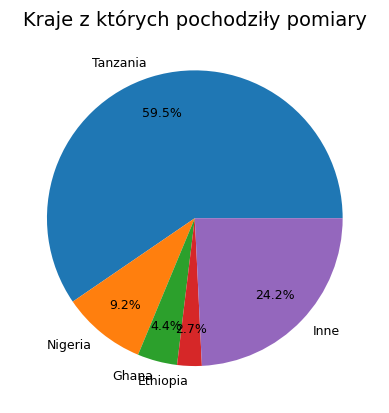

In [78]:
tanzania_n = tanzania.shape[0]
nigeria_n = nigeria.shape[0]
ghana_n = ghana.shape[0]
ethiopia_n = ethiopia.shape[0]
other_n = df.shape[0] - tanzania_n - nigeria_n - ethiopia_n - ghana_n

plt.pie([tanzania_n, ghana_n, nigeria_n, ethiopia_n, other_n], labels = ['Tanzania', 'Nigeria', 'Ghana', 'Ethiopia', 'Inne'], autopct='%1.1f%%', pctdistance = 0.75,
                textprops={'fontsize': '9'})
plt.title("Kraje z których pochodziły pomiary", fontsize = 14)

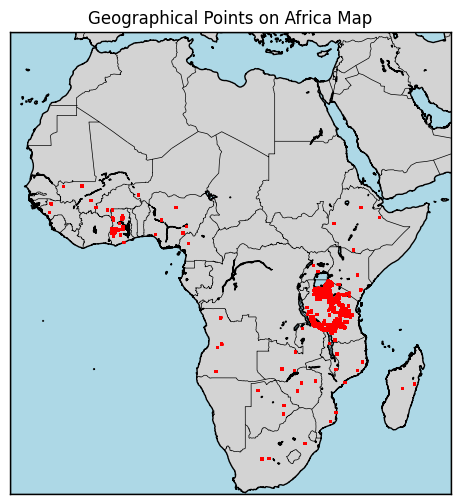

In [79]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(10, 6))

m = Basemap(projection='merc',
            llcrnrlat=-35, urcrnrlat=38,
            llcrnrlon=-20, urcrnrlon=55,
            resolution='i')

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgray', lake_color='lightblue')

points = df[['latitude', 'longitude']].to_numpy()

for lat, lon in points:
    x, y = m(lon, lat)
    m.plot(x, y, marker='o', color='red', markersize=1)

plt.title("Geographical Points on Africa Map")
plt.show()


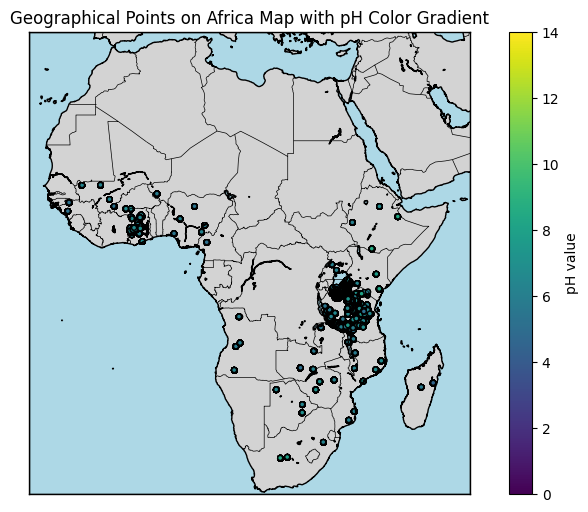

In [85]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from mpl_toolkits.basemap import Basemap
import numpy as np

# Example DataFrame for demonstration
# Uncomment and modify this if you'd like to simulate a DataFrame
# import pandas as pd
# df = pd.DataFrame({
#     'latitude': np.random.uniform(-35, 38, 50),
#     'longitude': np.random.uniform(-20, 55, 50),
#     'ph': np.random.uniform(0, 14, 50)  # typical pH range (0-14)
# })

plt.figure(figsize=(10, 6))

# Set basemap to Africa region
m = Basemap(projection='merc',
            llcrnrlat=-35, urcrnrlat=38,
            llcrnrlon=-20, urcrnrlon=55,
            resolution='i')

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgray', lake_color='lightblue')

norm = Normalize(vmin=0, vmax=14)
cmap = cm.viridis  # you can choose any colormap you like

# Extract latitude, longitude and ph values from DataFrame
lats = df['latitude'].values
lons = df['longitude'].values
ph_values = df['ph'].values

# Project the lat/lon points to map coordinates
x, y = m(lons, lats)

# Create a scatter plot with colored points based on ph values
sc = m.scatter(x, y, c=ph_values, cmap=cmap, norm=norm, marker='.', edgecolor='k', s=50)

# Add a colorbar to explain the color mapping
plt.colorbar(sc, label='pH value')

plt.title("Geographical Points on Africa Map with pH Color Gradient")
plt.show()


In [80]:
columns = df.columns.to_list()[6:]
columns

['aluminium_extractable',
 'calcium_extractable',
 'carbon_organic',
 'carbon_total',
 'copper_extractable',
 'iron_extractable',
 'magnesium_extractable',
 'manganese_extractable',
 'nitrogen_total',
 'ph',
 'potassium_extractable']

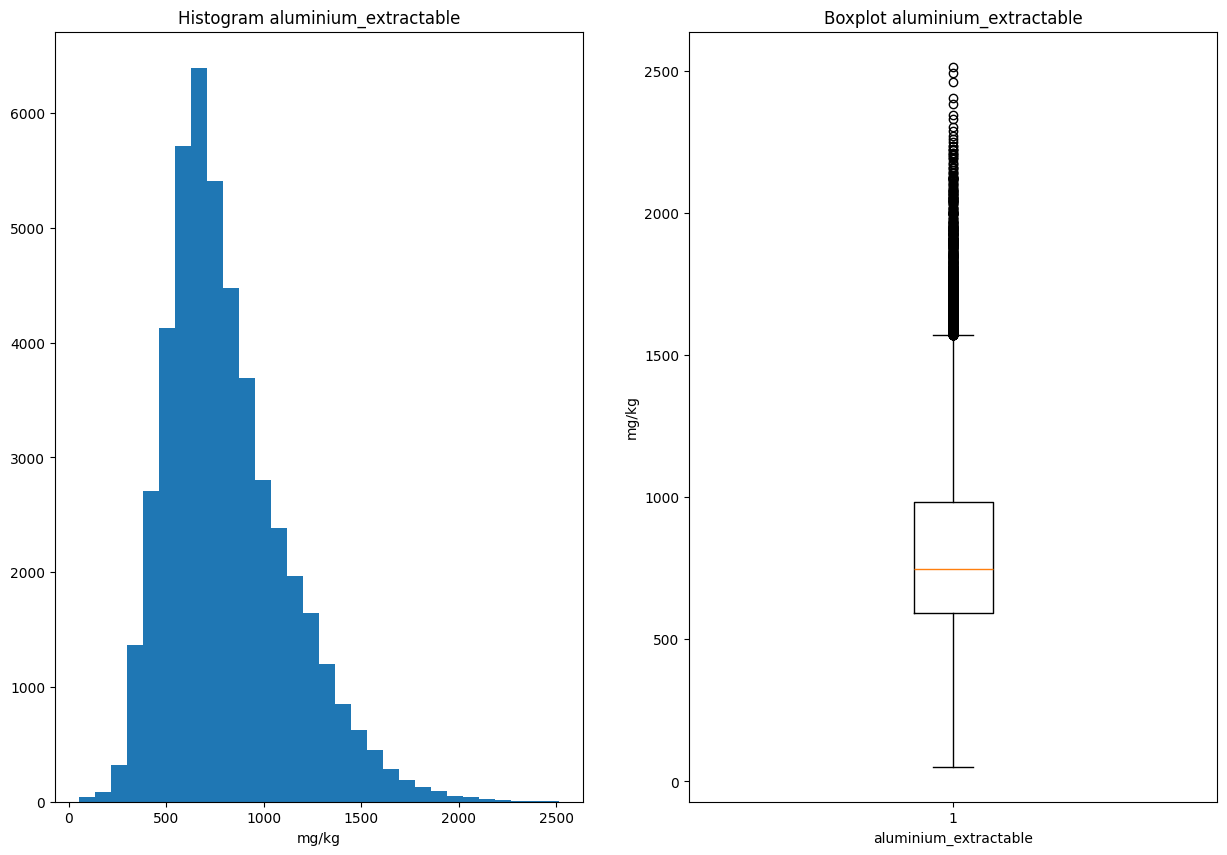

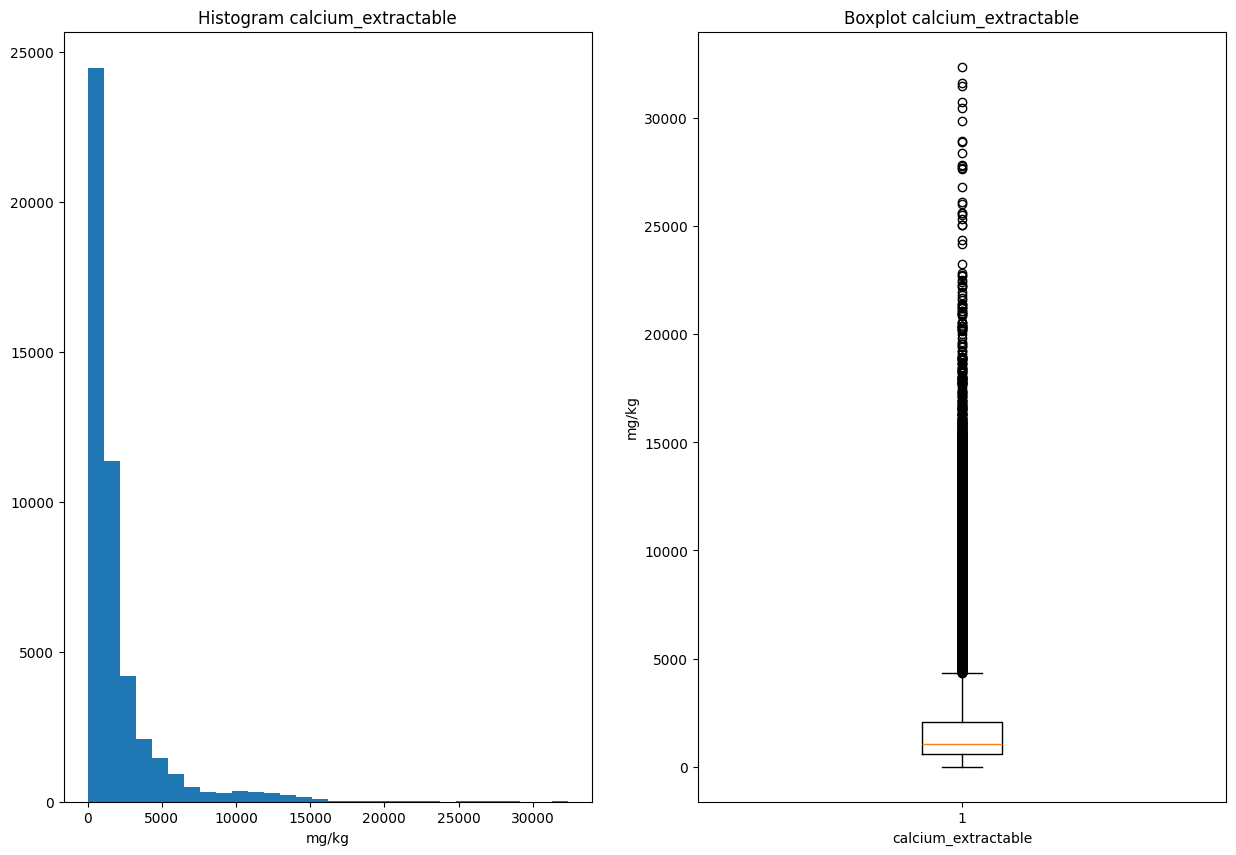

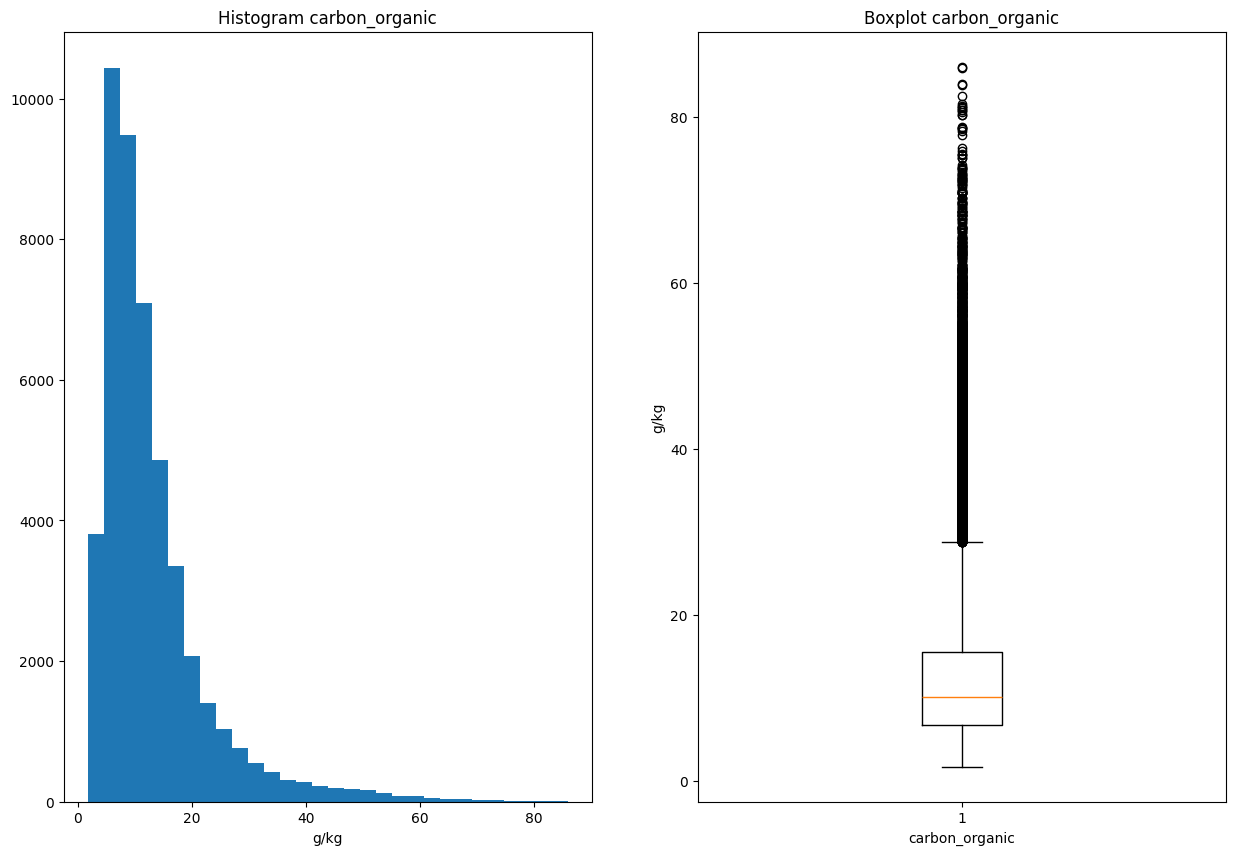

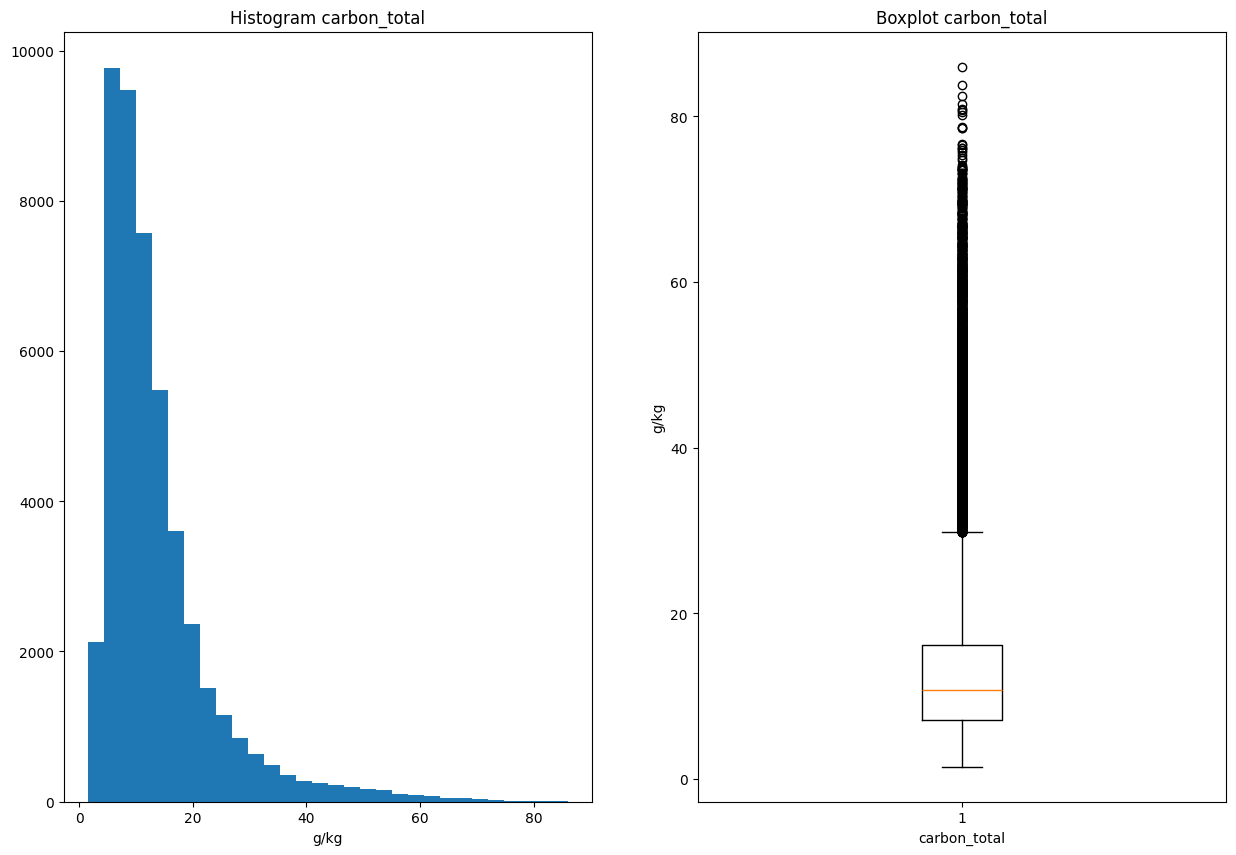

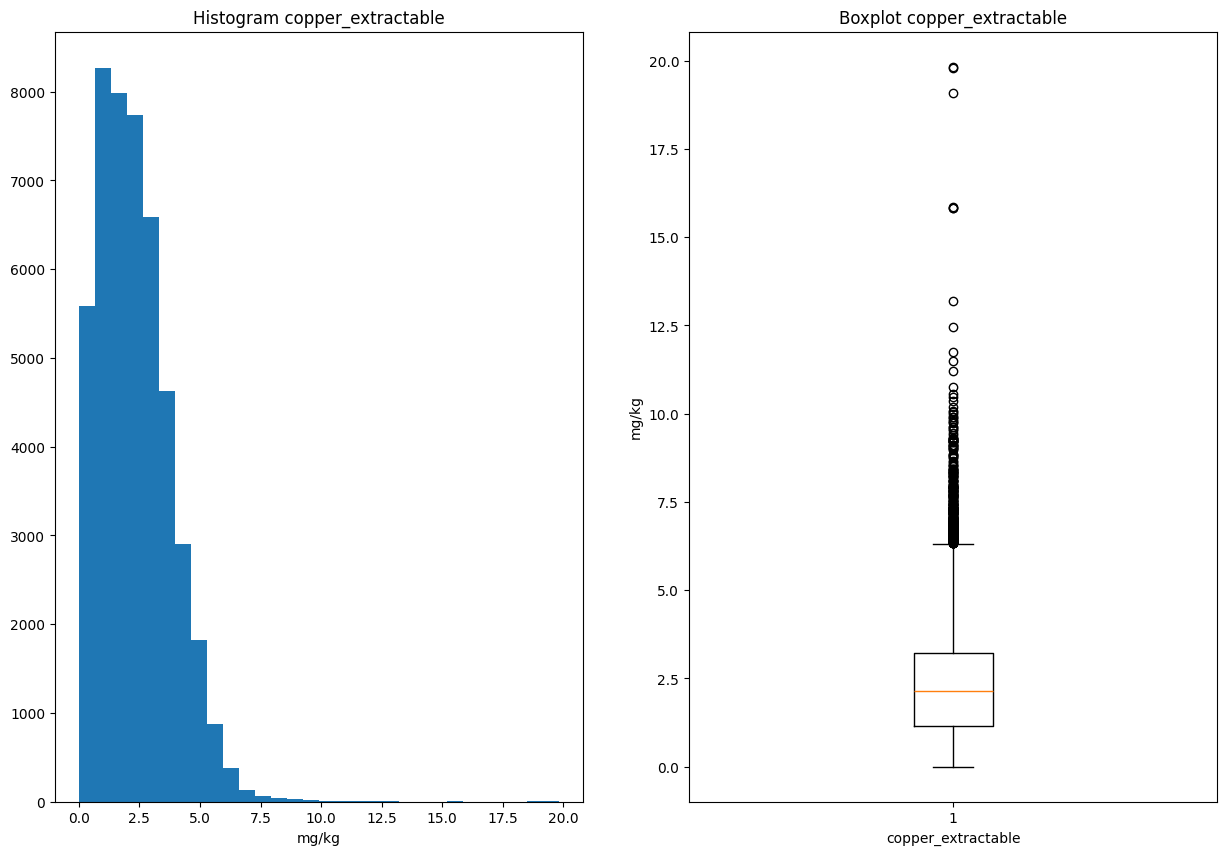

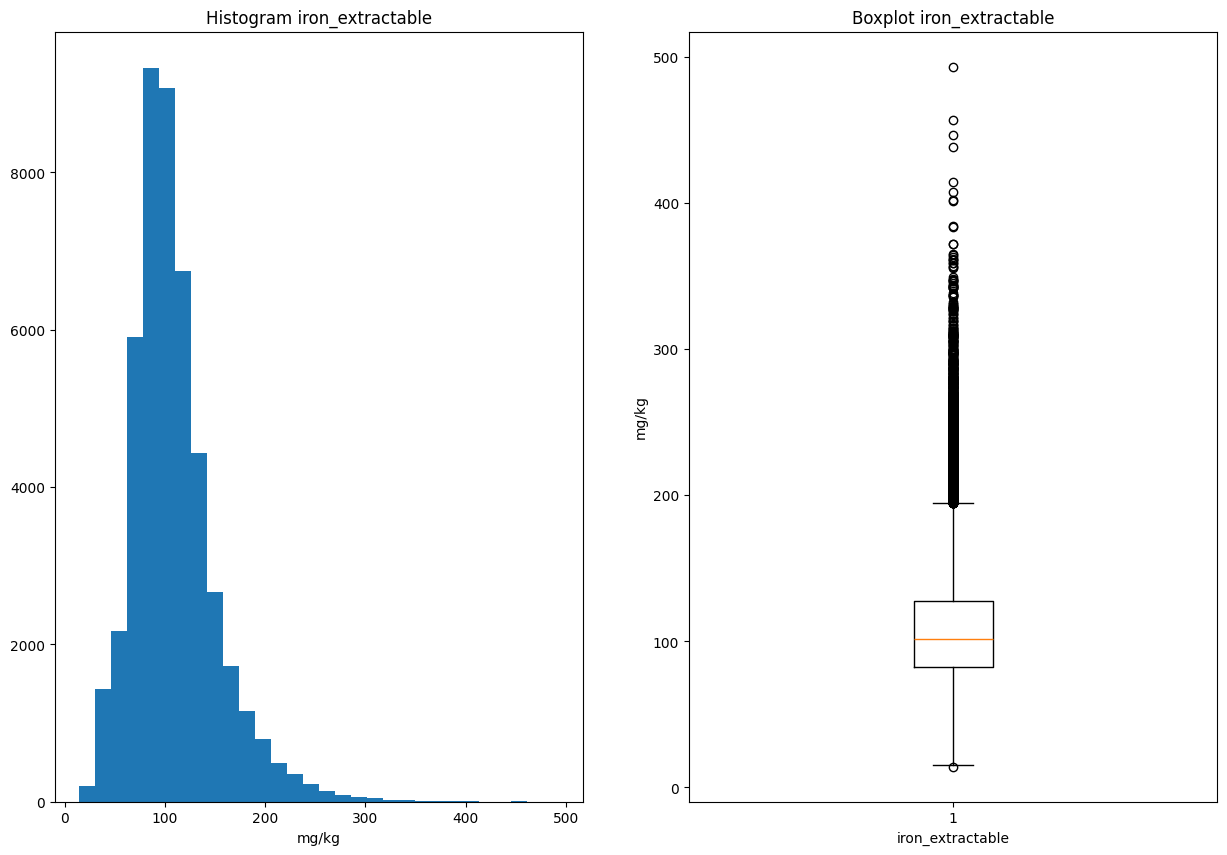

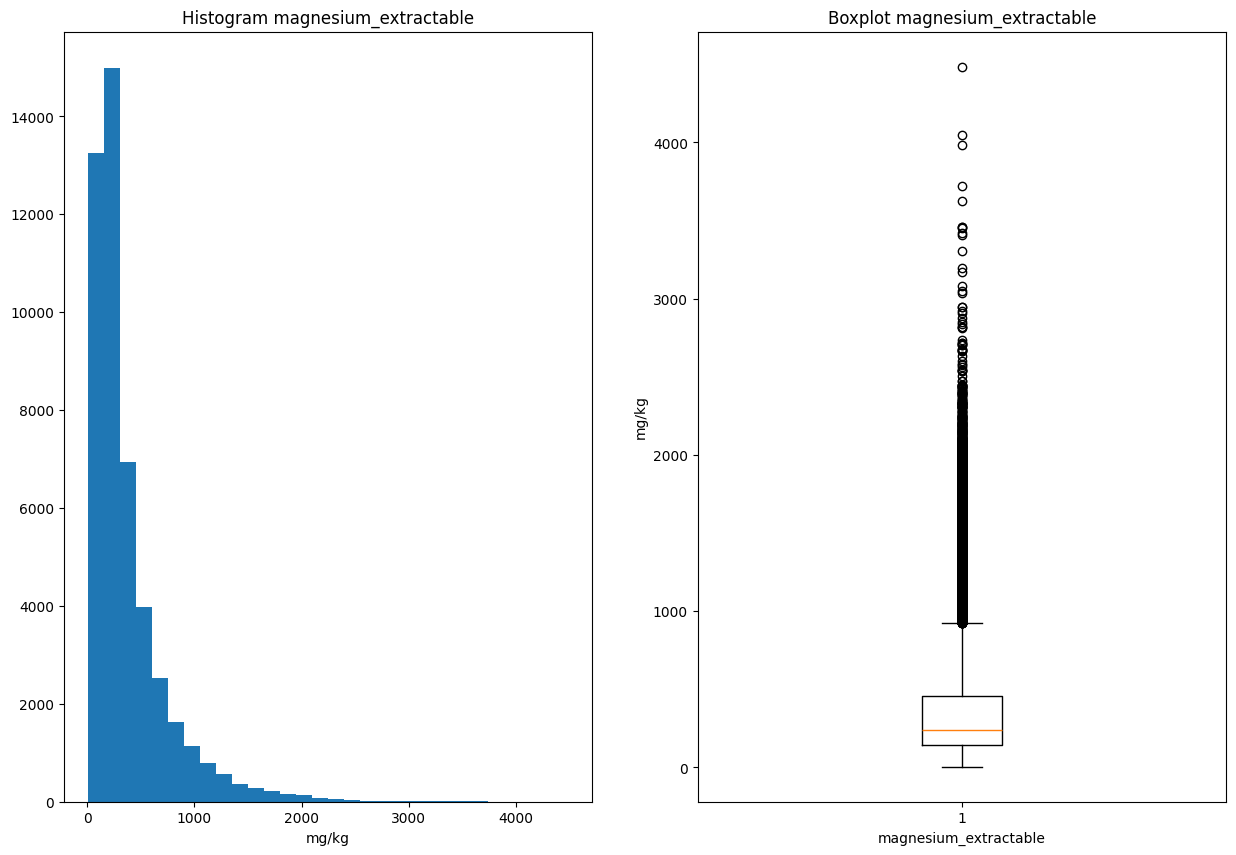

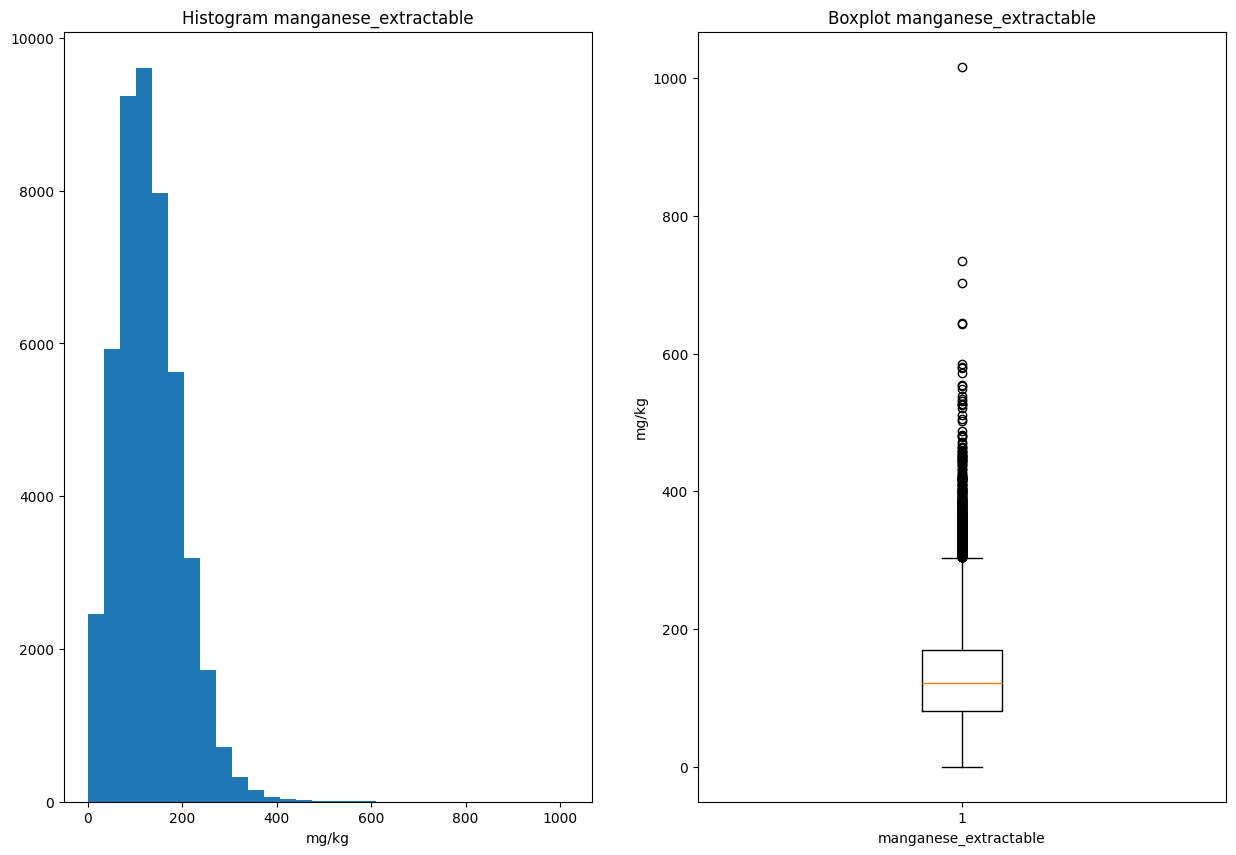

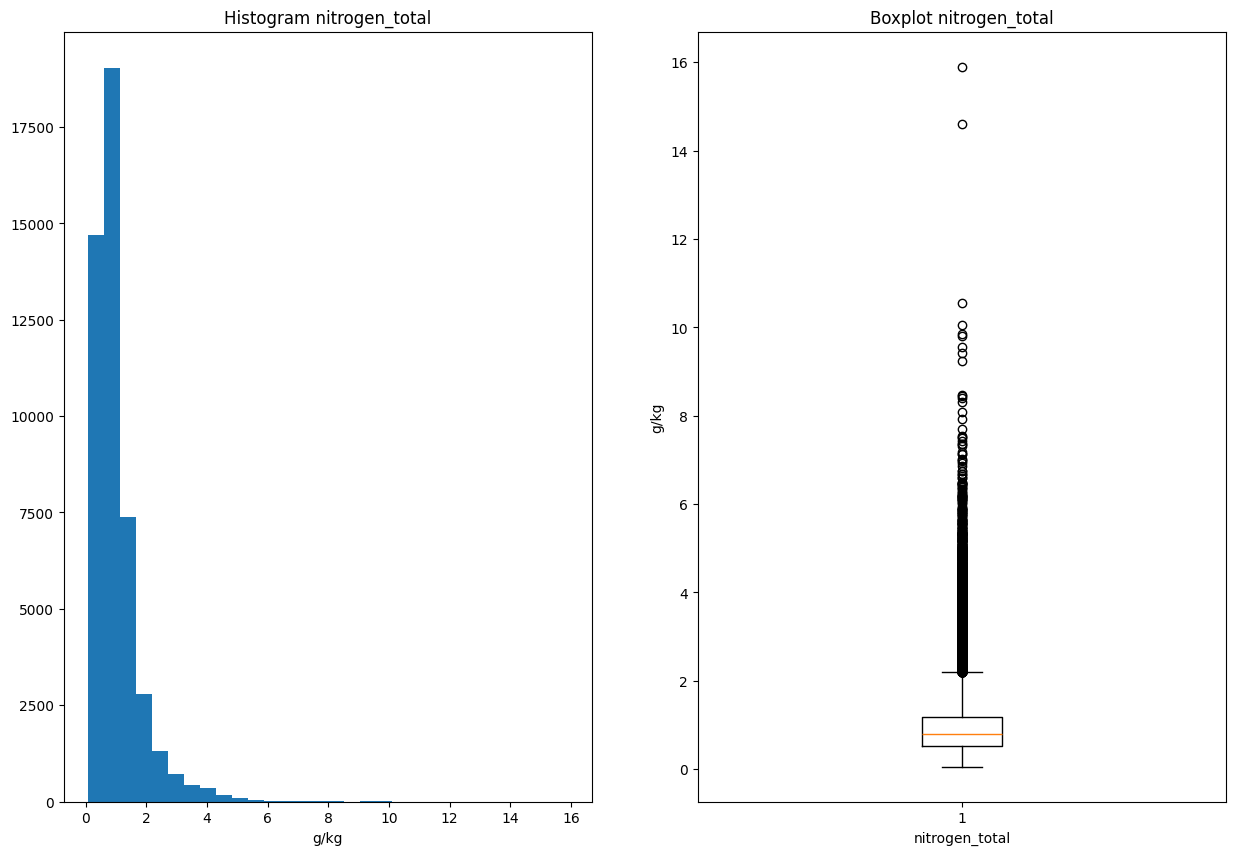

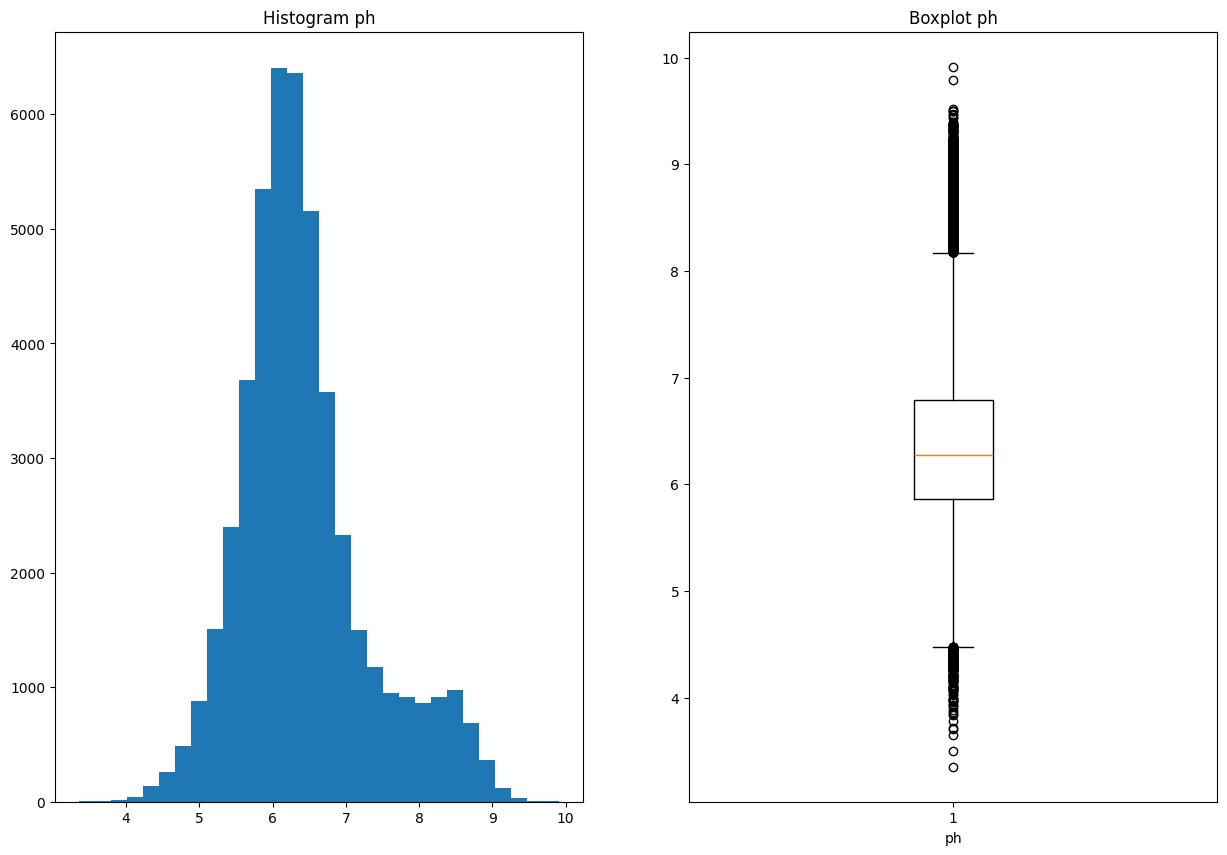

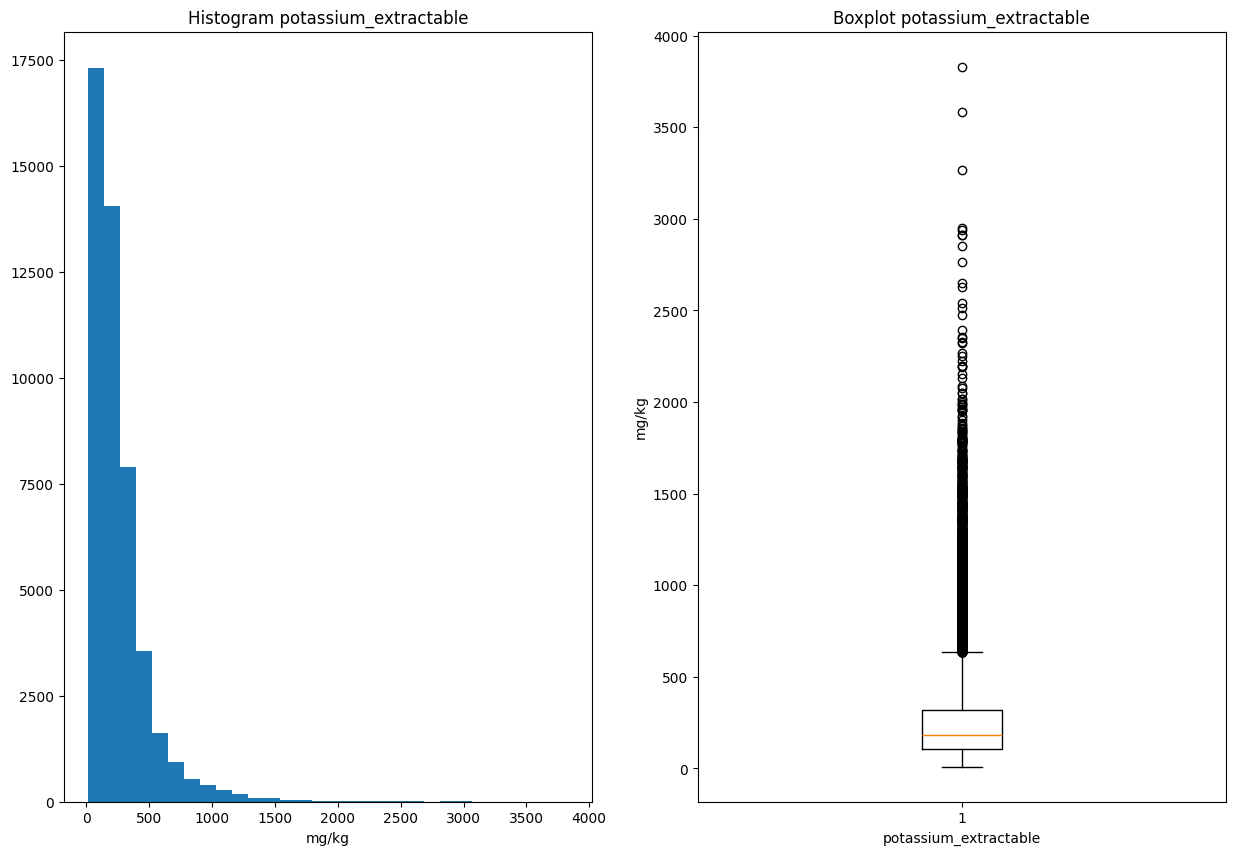

In [81]:
mg_kg = [columns[x] for x in [0, 1, 4, 5, 6, 7, 10]]
for idx, column in enumerate(columns):
    entity = 'g/kg'  # Default entity
    if idx in [0, 1, 4, 5, 6, 7, 10]:
        entity = 'mg/kg'  # Set to 'mg' for specific indices
    if column == 'ph':
        entity = ''  # No unit for 'ph'
    
    fig, axs = plt.subplots(1, 2, figsize = (15, 10))
    axs[0].hist(df[column], bins = 30)
    axs[0].set_xlabel(entity)
    axs[0].set_title(f"Histogram {column}")

    axs[1].boxplot(df[column])
    axs[1].set_ylabel(entity)
    axs[1].set_xlabel(column)
    axs[1].set_title(f"Boxplot {column}")

    plt.show()

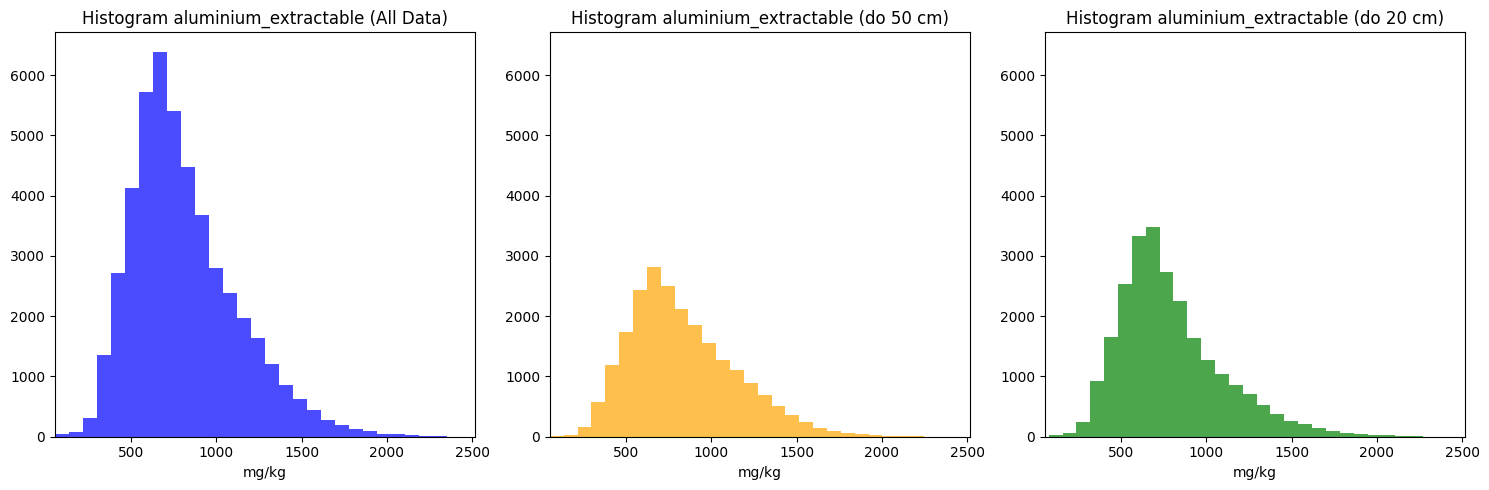

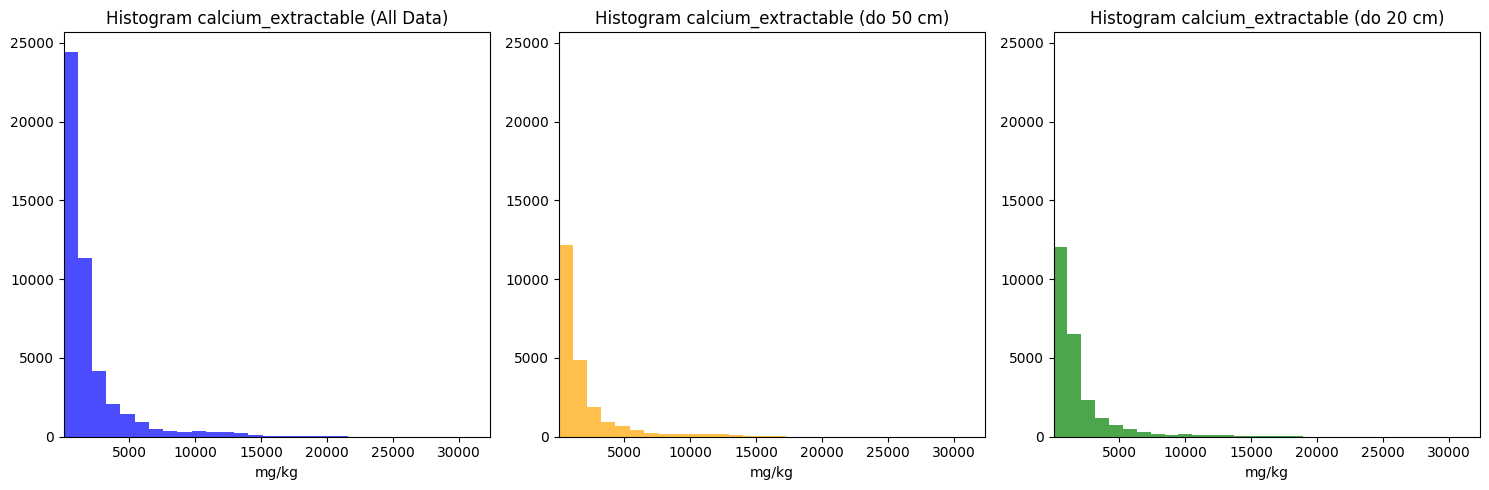

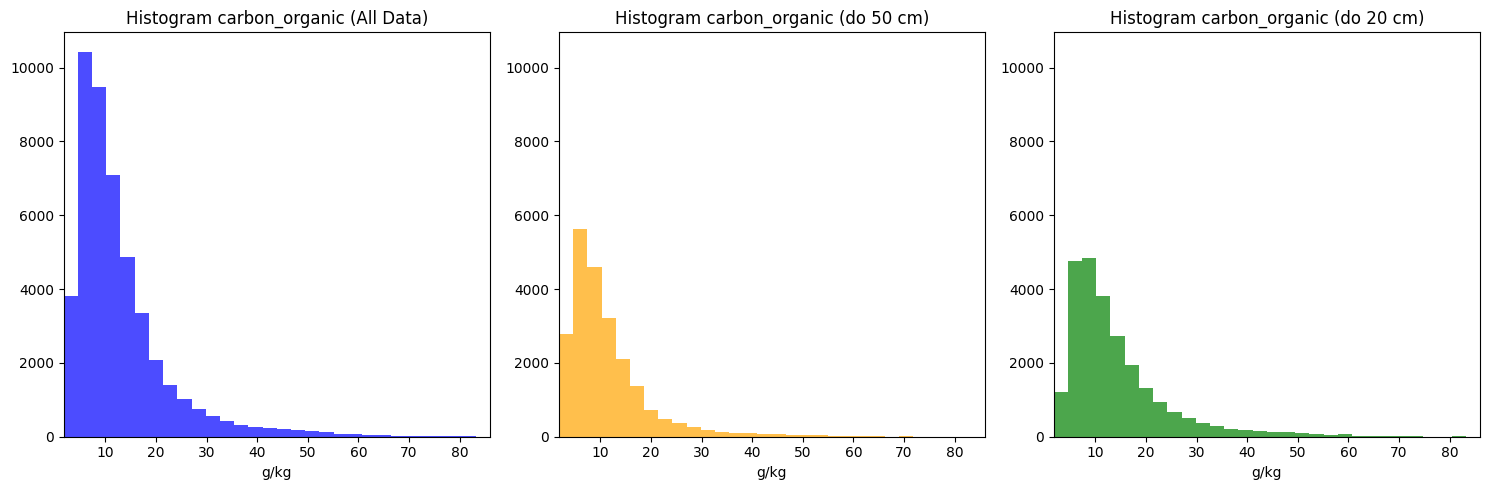

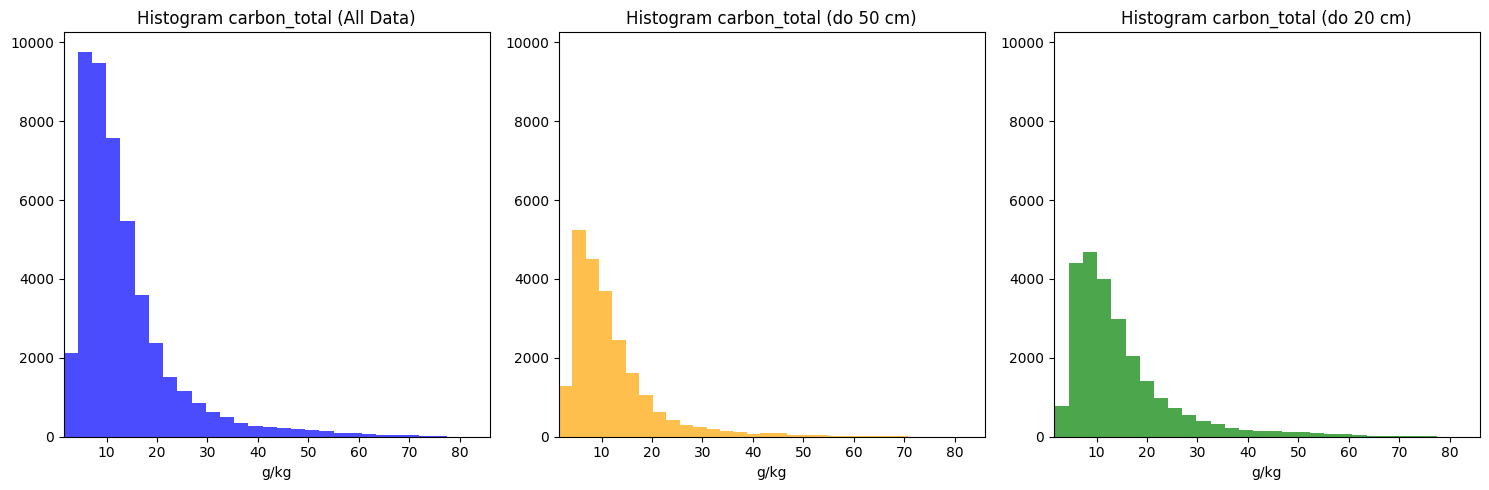

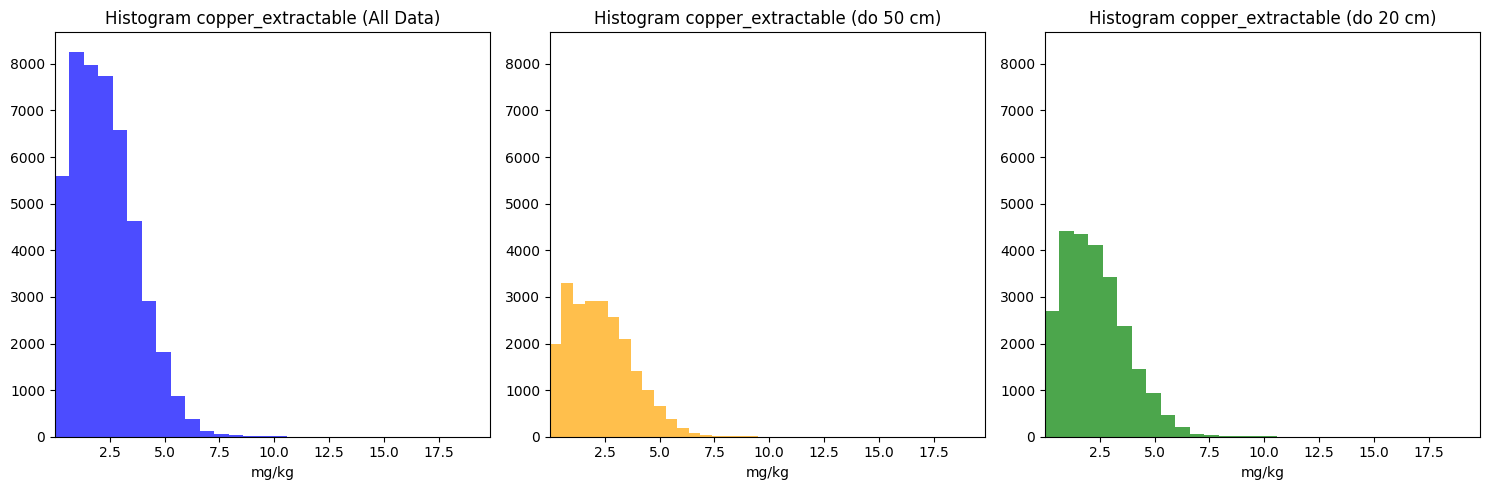

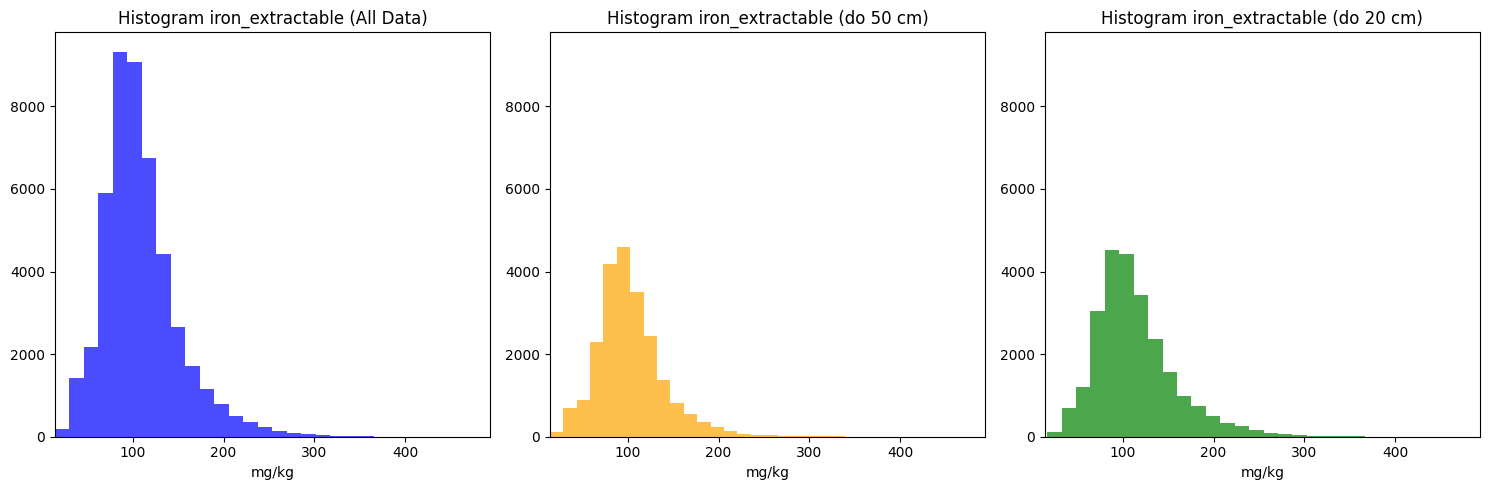

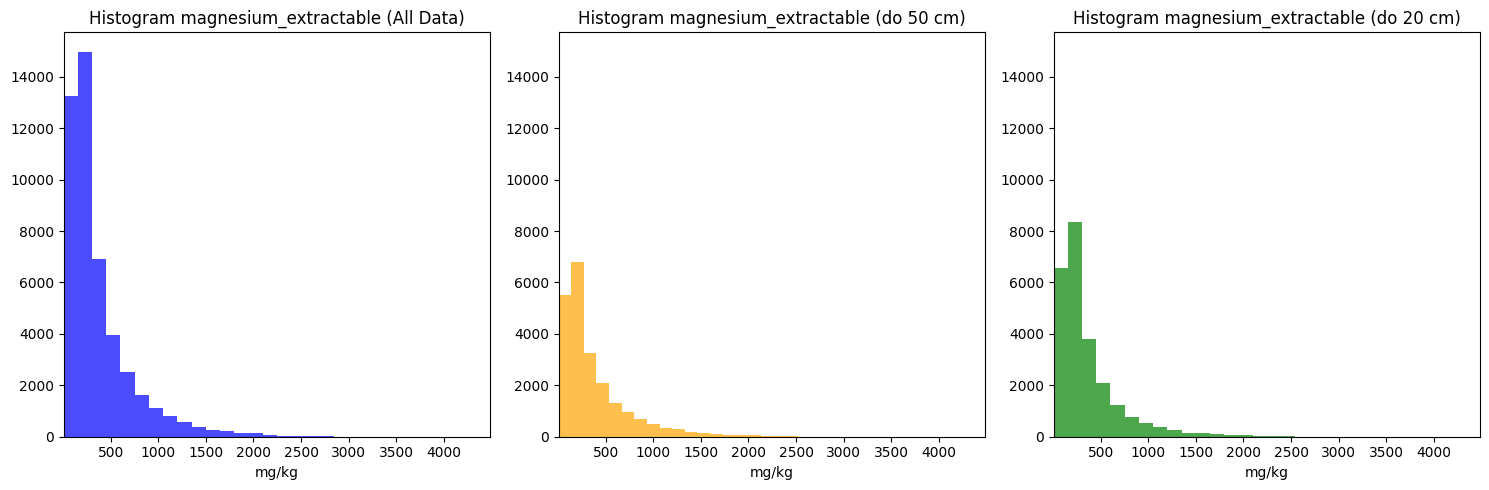

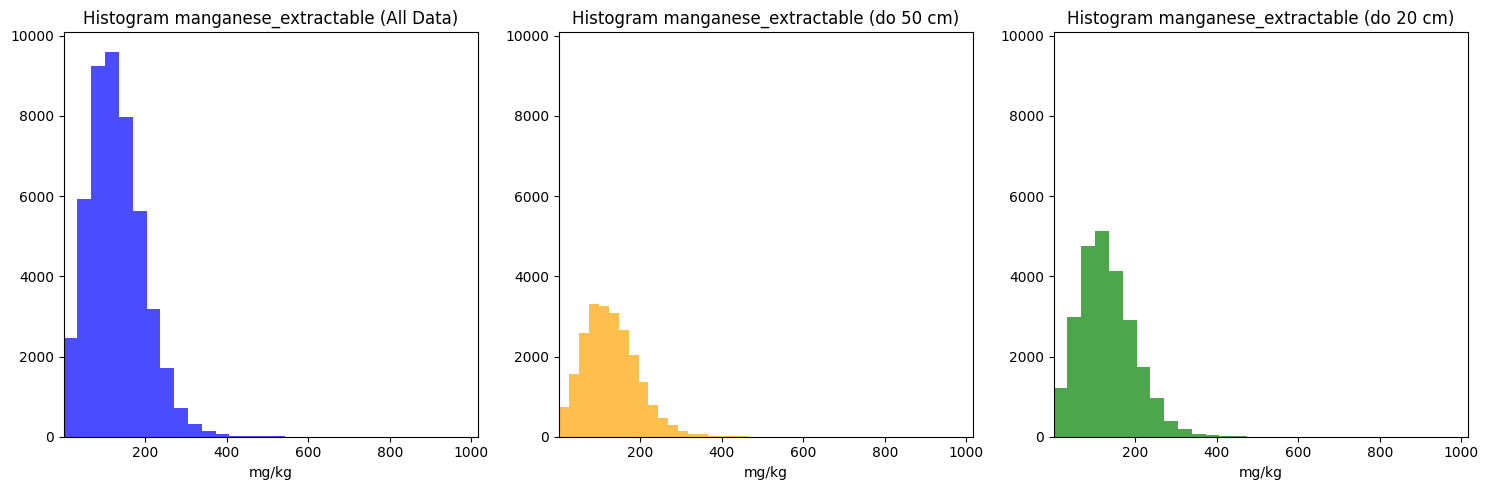

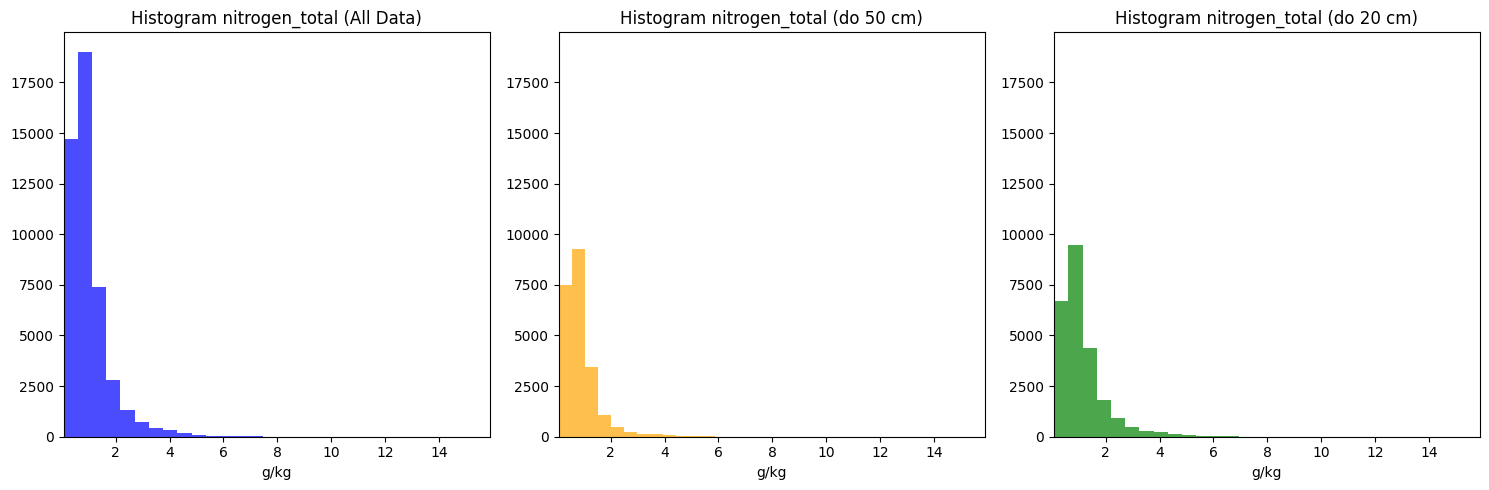

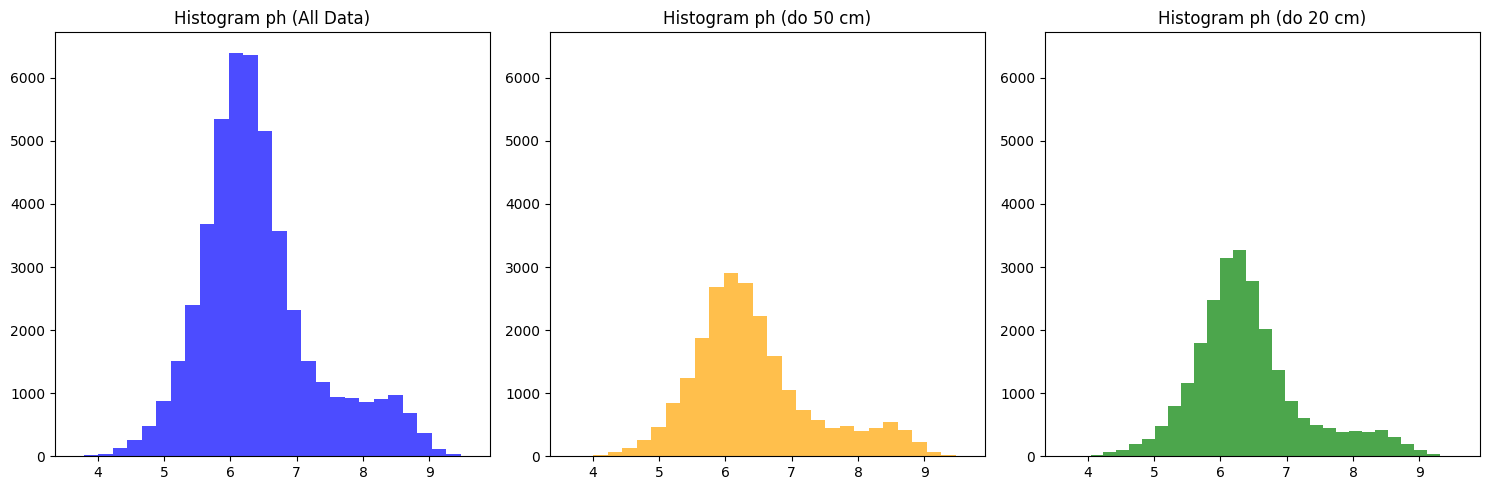

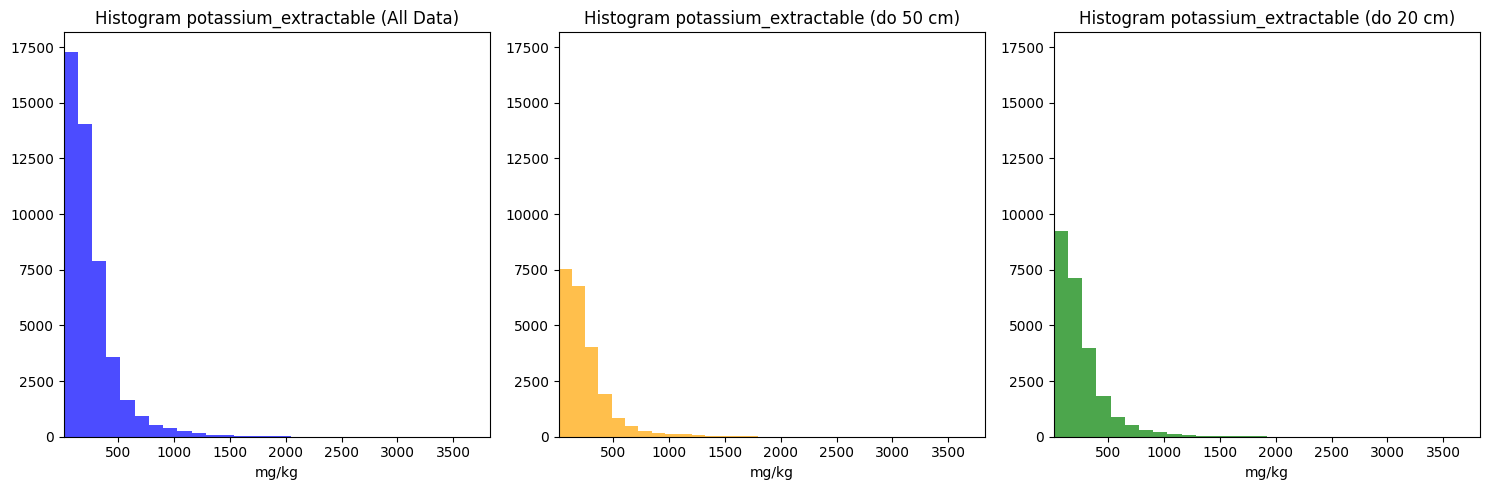

In [82]:
mg_kg = [columns[x] for x in [0, 1, 4, 5, 6, 7, 10]]
for idx, column in enumerate(columns):
    entity = 'g/kg'
    if idx in [0, 1, 4, 5, 6, 7, 10]:
        entity = 'mg/kg'
    if column == 'ph':
        entity = ''

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].hist(df[column], bins=30, alpha=0.7, color='blue')
    axs[0].set_xlabel(entity)
    axs[0].set_title(f"Histogram {column} (All Data)")

    axs[1].hist(df.loc[df['horizon_lower'] == 50, column], bins=30, alpha=0.7, color='orange')
    axs[1].set_xlabel(entity)
    axs[1].set_title(f"Histogram {column} (do 50 cm)")

    axs[2].hist(df.loc[df['horizon_lower'] == 20, column], bins=30, alpha=0.7, color='green')
    axs[2].set_xlabel(entity)
    axs[2].set_title(f"Histogram {column} (do 20 cm)")

    x_min = min(df[column].min(), df.loc[df['horizon_lower'] == 20, column].min(), df.loc[df['horizon_lower'] == 0, column].min())
    x_max = max(df[column].max(), df.loc[df['horizon_lower'] == 20, column].max(), df.loc[df['horizon_lower'] == 0, column].max())
    for ax in axs:
        ax.set_xlim(x_min, x_max)

    y_max = max(ax.get_ylim()[1] for ax in axs)
    for ax in axs:
        ax.set_ylim(0, y_max)

    plt.tight_layout()
    plt.show()

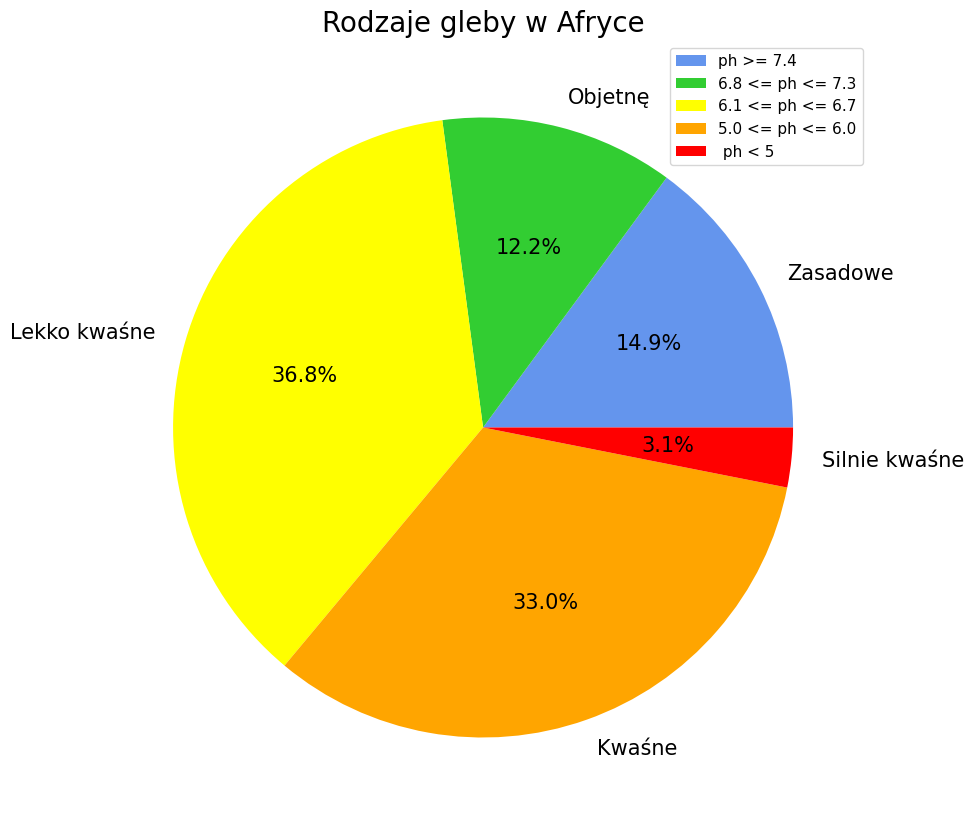

In [83]:
zasadowe = df[df['ph'] >= 7.4].shape[0]
obojetne = df[(df['ph'] >= 6.8) & (df['ph'] < 7.4)].shape[0]
lekko_kwasne = df[(df['ph'] >= 6.1) & (df['ph'] <= 6.7)].shape[0]
kwasne = df[(df['ph'] >= 5.0) & (df['ph'] <= 6.0)].shape[0]
mocno_kwasne = df[df['ph'] <5.0].shape[0]
colors_p = ['#6495ED', '#32CD32', '#FFFF00', '#FFA500', '#FF0000']

plt.figure(figsize = (10, 20))
plt.pie([zasadowe, obojetne, lekko_kwasne, kwasne, mocno_kwasne], colors = colors_p, labels = ['Zasadowe', 'Objetnę', 'Lekko kwaśne', 'Kwaśne', 'Silnie kwaśne'], autopct='%1.1f%%', pctdistance = 0.6,
        textprops={'fontsize': '15'})
plt.title("Rodzaje gleby w Afryce", fontsize = 20)
plt.legend(loc = 'upper right', labels = ['ph >= 7.4', '6.8 <= ph <= 7.3', '6.1 <= ph <= 6.7', '5.0 <= ph <= 6.0', ' ph < 5'], fontsize = 11)
